In [110]:
# Libraries
%matplotlib inline

import matplotlib as plt
import numpy as np
import pandas

from IPython.display import display, HTML

In [16]:
# Load the dictionary
dict_ref = pandas.read_excel("data/Data_Dictionary.xlsx", header=2)
dict_ref

,Columns,Description
0,card_id,Unique card identifier
1,first_active_month,"'YYYY-MM', month of first purchase"
2,feature_1,Anonymized card categorical feature
3,feature_2,Anonymized card categorical feature
4,feature_3,Anonymized card categorical feature
5,target,Loyalty numerical score calculated 2 months af...


In [9]:
train_data = pandas.read_csv("data/train.csv")
train_data[:10]

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749
5,2016-09,C_ID_0894217f2f,4,2,0,0.871585
6,2016-12,C_ID_7e63323c00,3,2,1,0.230129
7,2017-09,C_ID_dfa21fc124,3,2,1,2.135850
8,2017-08,C_ID_fe0fdac8ea,2,1,0,-0.065406
9,2016-08,C_ID_bf62c0b49d,2,2,0,0.300062


In [30]:
train_data.count()

first_active_month    201917
card_id               201917
feature_1             201917
feature_2             201917
feature_3             201917
target                201917
dtype: int64

In [55]:
t_std = train_data["target"].std()
t_std

3.8504999954861012

In [56]:
t_mean = train_data["target"].mean()
t_mean

-0.3936362990779874

In [67]:
#filtered train_data
filtered = train_data[(train_data["target"] >= -8) & (train_data["target"] <= 8)]
filtered.count()

first_active_month    199371
card_id               199371
feature_1             199371
feature_2             199371
feature_3             199371
target                199371
dtype: int64

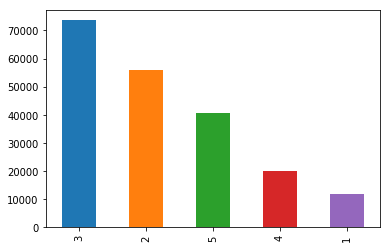

In [62]:
# Basic visualization features
feat1_counts = train_data["feature_1"].value_counts()
feat1_counts.plot.bar()

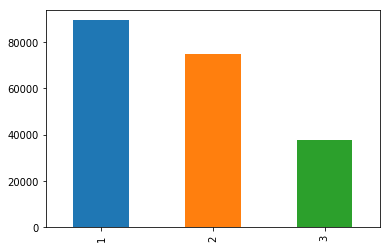

In [63]:
feat2_counts = train_data["feature_2"].value_counts()
feat2_counts.plot.bar()

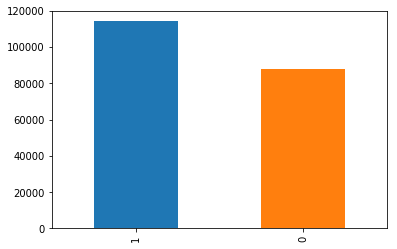

In [64]:
feat3_counts = train_data["feature_3"].value_counts()
feat3_counts.plot.bar()

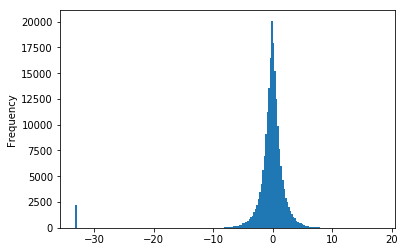

In [65]:
train_data["target"].plot.hist(bins=200)

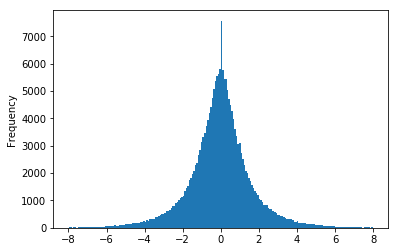

In [90]:
filtered["target"].plot.hist(bins=200)

# Outros datasets

Agora vamos tentar analisar os outros dados presentes nos datasets para encontrar uma tese que relacione as heurísticas e suas predições

In [102]:
transactions = pandas.read_csv("data/historical_transactions.csv")
transactions.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [133]:
transactions[transactions["authorized_flag"] == "Y"].sort_values(by="purchase_date").head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
7289521,Y,C_ID_da2090f28e,69,N,0,A,623,M_ID_f001319a61,-11,-0.686802,2017-01-01 00:00:08,1.0,9,4
18512762,Y,C_ID_efced389a0,76,N,1,B,842,M_ID_18038b5ae7,-12,-0.566590,2017-01-01 00:00:59,3.0,2,37
14942234,Y,C_ID_83561fe74a,233,N,1,B,661,M_ID_52d3026407,-13,-0.559227,2017-01-01 00:01:41,1.0,9,8
28659693,Y,C_ID_479fd6392a,-1,Y,1,B,839,M_ID_e5374dabc0,-1,-0.737892,2017-01-01 00:02:03,NaN,-1,29
20004812,Y,C_ID_1cf6056088,69,N,0,A,278,M_ID_2cf6dc1f6f,-4,0.004418,2017-01-01 00:02:12,1.0,9,37


In [132]:
transactions.describe()

,city_id,installments,merchant_category_id,month_lag,purchase_amount,category_2,state_id,subsector_id
count,2.911236e+07,2.911236e+07,2.911236e+07,2.911236e+07,2.911236e+07,2.645950e+07,2.911236e+07,2.911236e+07
mean,1.293256e+02,6.484954e-01,4.810130e+02,-4.487294e+00,3.640090e-02,2.194578e+00,1.056679e+01,2.684839e+01
std,1.042563e+02,2.795577e+00,2.493757e+02,3.588800e+00,1.123522e+03,1.531896e+00,6.366927e+00,9.692793e+00
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.300000e+01,-7.469078e-01,1.000000e+00,-1.000000e+00,-1.000000e+00
25%,5.300000e+01,0.000000e+00,3.070000e+02,-7.000000e+00,-7.203559e-01,1.000000e+00,9.000000e+00,1.900000e+01
50%,9.000000e+01,0.000000e+00,4.540000e+02,-4.000000e+00,-6.883495e-01,1.000000e+00,9.000000e+00,2.900000e+01
75%,2.120000e+02,1.000000e+00,7.050000e+02,-2.000000e+00,-6.032543e-01,3.000000e+00,1.600000e+01,3.400000e+01
max,3.470000e+02,9.990000e+02,8.910000e+02,0.000000e+00,6.010604e+06,5.000000e+00,2.400000e+01,4.100000e+01


In [119]:
display(train_data[train_data["card_id"] == "C_ID_92a2005557"]["target"])
display(transactions[transactions["card_id"] == "C_ID_92a2005557"].sort_values(by="purchase_amount")[-10:])

0   -0.820283
Name: target, dtype: float64

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
12454993,Y,C_ID_92a2005557,69,N,0,A,278,M_ID_af21634411,-2,-0.390704,2017-12-17 00:18:58,1.0,9,37
12454897,Y,C_ID_92a2005557,69,N,0,A,278,M_ID_0ef7af562d,-2,-0.362109,2017-12-11 13:40:13,1.0,9,37
12454967,Y,C_ID_92a2005557,69,N,0,A,278,M_ID_5357def7c9,-2,-0.338637,2017-12-02 15:27:12,1.0,9,37
12454981,Y,C_ID_92a2005557,69,N,0,A,705,M_ID_da01980131,-2,-0.338517,2017-12-27 21:28:31,1.0,9,33
12454876,Y,C_ID_92a2005557,69,N,0,A,278,M_ID_ab67f6c982,-7,-0.307232,2017-07-08 15:13:18,1.0,9,37
12454984,Y,C_ID_92a2005557,69,N,0,A,108,M_ID_0888bdef7e,-2,-0.266600,2017-12-10 09:23:37,1.0,9,34
12455121,Y,C_ID_92a2005557,69,N,0,A,278,M_ID_ed31e01703,-1,-0.231453,2018-01-11 20:34:12,1.0,9,37
12455075,Y,C_ID_92a2005557,69,N,0,A,834,M_ID_89d306f9ff,-2,-0.066312,2017-12-17 13:48:05,1.0,9,27
12454946,Y,C_ID_92a2005557,69,N,0,A,333,M_ID_a5cbe92e88,-2,0.050639,2017-12-11 10:13:01,1.0,9,10
12455037,Y,C_ID_92a2005557,69,N,0,A,225,M_ID_4179a7f668,-2,2.258395,2017-12-13 07:58:54,1.0,9,9


In [99]:
merchants = pandas.read_csv("data/merchants.csv")
merchants.head()

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,N,E,E,-0.40,...,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,N,E,E,-0.72,...,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,N,E,E,-82.13,...,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN


In [100]:
nmt = pandas.read_csv("data/new_merchant_transactions.csv")
nmt.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671925,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,2018-03-22 21:07:53,NaN,-1,29


In [101]:
sample = pandas.read_csv("data/sample_submission.csv")
sample.head()

,card_id,target
0,C_ID_0ab67a22ab,0
1,C_ID_130fd0cbdd,0
2,C_ID_b709037bc5,0
3,C_ID_d27d835a9f,0
4,C_ID_2b5e3df5c2,0
